In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


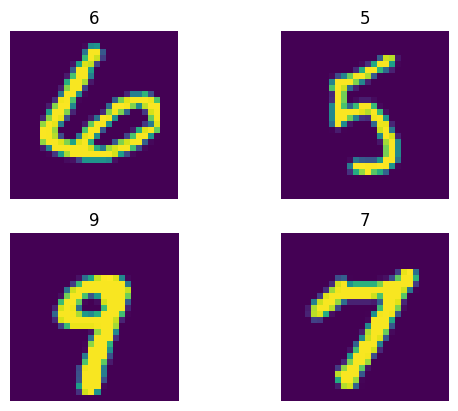

In [ ]:
import random
for i in range(4):
  index = random.randint(0,len(X_train))
  plt.subplot(2,2,i+1)
  plt.imshow(X_train[index])
  plt.title(y_train[index])
  plt.axis(False)

In [ ]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

In [ ]:
class_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(23,(3,3),activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.experimental.RMSprop(0.01),
              metrics = ['accuracy'])
model.fit(X_train_norm,y_train,epochs = 20,validation_data = (X_test_norm,y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1307 - accuracy: 0.9610 - val_loss: 0.0702 - val_accuracy: 0.9771
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0683 - accuracy: 0.9800 - val_loss: 0.0843 - val_accuracy: 0.9733
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0561 - accuracy: 0.9840 - val_loss: 0.0645 - val_accuracy: 0.9815
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0493 - accuracy: 0.9866 - val_loss: 0.0640 - val_accuracy: 0.9828
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0447 - accuracy: 0.9881 - val_loss: 0.0715 - val_accuracy: 0.9828
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9896 - val_loss: 0.0763 - val_accuracy: 0.9816
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9905 - val_loss: 0.0900 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 23)        230       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 23)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3887)              0         
                                                                 
 dense_14 (Dense)            (None, 10)                38880     
                                                                 
Total params: 39110 (152.77 KB)
Trainable params: 39110 (152.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import itertools
from  sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes = None,figsize = (10,10),text_size = 15):

  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:,np.newaxis]   #Normalize our confusion matrix
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm,cmap = plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment = 'center',
    color = 'white' if cm[i,j]> threshold else "black",
    size = text_size*0.8
    )

In [ ]:
y_probs = model.predict(X_test_norm)
y_preds = y_probs.argmax(axis = 1)

313/313 [==============================] - 1s 2ms/step


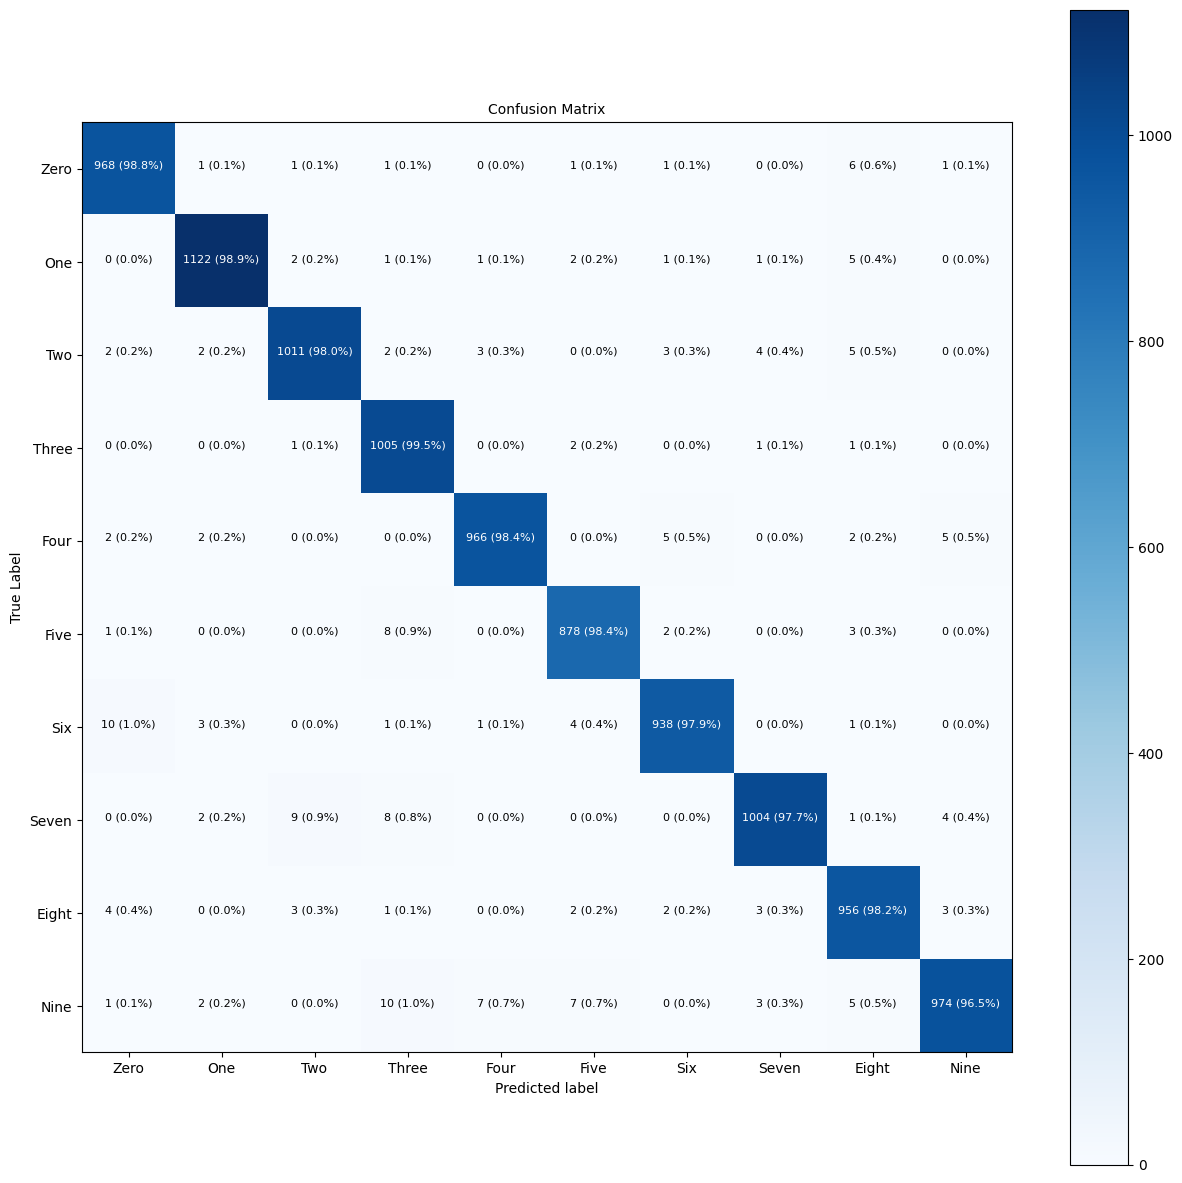

In [ ]:
make_confusion_matrix(y_true = y_test,
                      y_pred = y_preds,
                      classes = class_names,figsize = (15,15),
                      text_size = 10)

In [ ]:
def plot_random_image(model, images, true_labels, classes):
    plt.figure(figsize=(8, 8))
    for i in range(4):
        index = random.randint(0, len(images) - 1)
        target_image = images[index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[index]]

        plt.subplot(2, 2, i + 1)
        plt.imshow(target_image, cmap=plt.cm.binary)
        if pred_label == true_label:
            color = "green"
        else:
            color = "red"
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                          100 * tf.reduce_max(pred_probs),
                                                          true_label),
                   color=color)
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 16ms/step


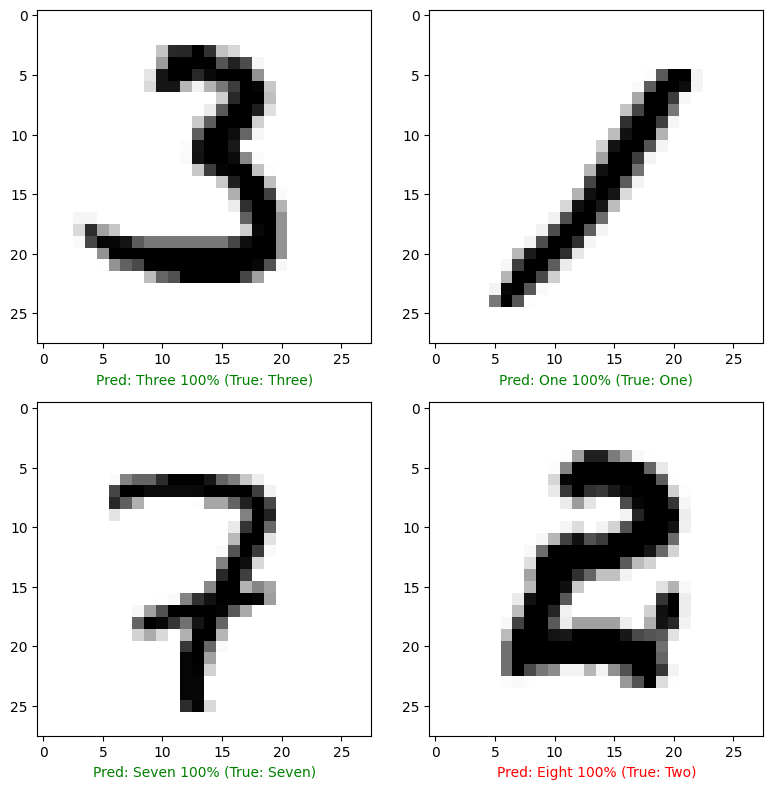

In [ ]:
plot_random_image(model = model,
                  images = X_test_norm,
                  true_labels = y_test,
                  classes = class_names)